<a href="https://www.kaggle.com/code/karelbecerra/inference-enhanced-hand-data?scriptVersionId=212918179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook environment setup
> This notebook is for the intention of having an easy start process. You can find more '**production ready**' code for **training** and **inference** into **/classification** repository folder: [GitHub Repository](https://github.com/karelbecerra/sam-x-ray-medical-images-hand-sex-classification)


**Notebook requeriments**:
* Install public packages
* Import public packages

**Model**:
* Re use Training notebook code
* Setup working folders

**Inference**:
* Load parameters
* Load pre-trained model
* Load dataset
* Run inference
* Plot confusion matrix

***

### Notebook requeriments

In [1]:
# Import public packages
import os
import sys
import torch
import numpy as np

In [2]:
# Install public packages
!pip install torchsummary
!pip install munch

***

### Model & Code
There are 2 options:
* Clone github code [repository](https://github.com/karelbecerra/sam-x-ray-medical-images-hand-sex-classification)
* Inherit code from [Training](https://www.kaggle.com/code/karelbecerra/training-enhanced-hand-data) notebook.

In this notebook we will re use **Training** notebook. Therefore '**pre-trained model**' will be in notebook **output** folder as **enhanced_hand_data_run1.pth**

In [3]:
# Setup working folders to Training notebook output
troncho_base = '/kaggle/input/training-enhanced-hand-data/classification'
os.chdir(troncho_base)
sys.path.append(troncho_base)

# List code folders and file structure
os.listdir('./')

['train.py',
 'configs',
 'extract_contour.ipynb',
 'output',
 'datasets',
 '.gitignore',
 'multi_train.sh',
 'README.md',
 'stats',
 'outputs_inference.ipynb',
 'src',
 'display_trace.ipynb',
 'display_dataset_numpy_arrays.ipynb',
 'min_req.txt']

In [4]:
# List all pre-trained models
os.listdir('./output/models')

['.gitignore', 'enhanced_hand_data_run1.pth']

***
## Inference

In [5]:
from src.utils import config
from src.loaddataset import load_dataset_for_inference
from src.buildmodel import build_model
from src.utils.modelfile import load_model

In [6]:
# Load parameters
parameters = config.load_parameters('enhanced_hand_data')

# Build model (will load model architecture and default EfficientNet weights)
model, device = build_model(parameters)

# Load trained weights
model = load_model(parameters=parameters, model=model, model_file='enhanced_hand_data_run1.pth')

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 105MB/s]


Loading model ... Best epoch (20), Min loss (0.2033208932222451) 


/kaggle/input/training-enhanced-hand-data/classification/src/utils/modelfile.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_file, map_loc

In [7]:
# Load dataset
test_dataset = '/kaggle/input/sam-x-ray-medical-images-hand-sex-classification/enhanced_hand_data/tst_masked_he_400x300.npz'
test_loader = load_dataset_for_inference(data_file=test_dataset,  batch_size=600)

In [8]:
# Turn model to evaluation state
model.eval()

# Inference
with torch.no_grad():
    for i, data in enumerate(test_loader):
        x, target = data
        x = x.to(device)
        out = model(x)
        x = x.cpu().numpy()
        target = target.cpu().numpy()
        out = out.cpu().numpy()
        y_data = np.concatenate((y_data, target), axis=0) if i != 0 else target
        out_data = np.concatenate((out_data, out), axis=0) if i != 0 else out


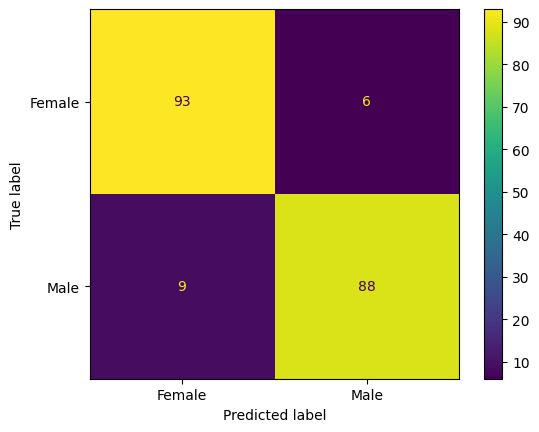

In [9]:
from stats.confusion_matrix import get_confusion_matrix, plot_confusion_matrix

# Create confusion matrix from ground thruth (y_data) vs prediction (out_data)
confusion_matrix, _, _ = get_confusion_matrix(y_data, out_data)

# Plot
plot_confusion_matrix( confusion_matrix )